<a href="https://colab.research.google.com/github/denisecammarota/matbio/blob/master/tp3/P3_Ej2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 3 - Ejercicio 2**: *Ecuaciones de Langevin*

In [ ]:
#importo librerías que me van a ser útiles en hacer las simulaciones
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('seaborn')

## **Ruido Aditivo**

Recordamos la consigna de estudio para el ruido aditivo. Se consideraba una población con una dinámica multiplicativa y con un ruido aditivo:

$x(t+1) = a x(t) + z(t)$,

donde $z(t)$ es una variable aleatoria de distribución gaussiana de media $\mu$ y desviación estándar $\sigma$. 

Entonces, nos piden simular una decena de trayectorias con ruido de Langevin aditivo, de acuerdo con los parámetros de la guía. Luego, las comparamos en un grafico de $x(t)$ con la trayectoria real, sin ruido. 
Los parámetros del sistema serán: $\mu = 0$, $\sigma = 0.2$ y $a = 1.05$. Se requiere que la condición inicial sea $x(0) = 1$ y el tiempo final $t_f = 50$.   



In [ ]:
#para las simulaciones con ruido aditivo, esta funcion me va a producir una instancia en particular
def langevin_additive(mean,sigma,xo,a,tf):
  #mean: media del ruido aditivo a sumar
  #sigma: sigma del ruido aditivo a sumar
  #xo: condición inicial x(0)
  #a: valor de la constante a del enunciado
  #tf: tiempo final, la simulación va desde t=0 hasta t=tf
  x = np.zeros(shape=tf+1)
  x[0] = 1 #pongo el primer valor de condicion inicial
  #y ahora el resto de los valores
  for i in range(tf):
    x[i+1] = a*x[i] + np.random.normal(mean,sigma)
  return x

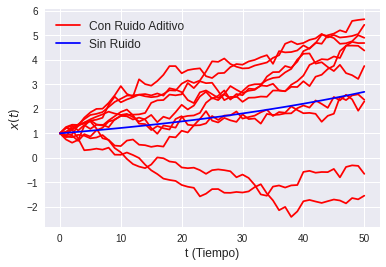

In [ ]:
#inicializo con los parámetros que me piden en la guía
mean = 0
sigma = 0.2
xo = 1
a = 1.02
tf = 50
#y ahora me piden una decena de trayectorias
#también, dibujo la trayectoria sin ruido
#en gráficos de x(t) para todas las trayectorias
#primero, grafico la decena de trayectorias con ruido de langevin
for i in range(10):
  if i == 0:
    plt.plot(langevin_additive(mean,sigma,xo,a,tf),'-r',label='Con Ruido Aditivo')
  else:
    plt.plot(langevin_additive(mean,sigma,xo,a,tf),'-r')
#segundo, grafico la trayectoria sin ruido, poniendo mean=sigma=0
plt.plot(langevin_additive(0,0,xo,a,tf),'-b',label='Sin Ruido') 
plt.xlabel(r't (Tiempo)',fontsize=12)
plt.ylabel(r'$x(t)$',fontsize=12)
plt.legend(fontsize=12)

Ahora, calculamos la distribución de probabilidad $P(x,t)$ utilizando el tiempo $t$ como un parámetro. Para esto, simulamos varias trayectorias y graficamos histogramas normalizados para diferentes valores discretos de $t$. 

También, vamos a calcular los valores de la media $\mu$ y de la desviación estándard $\sigma$. Así, sobre los histogramas, graficaremos la distribución gaussiana que correspondería. 


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


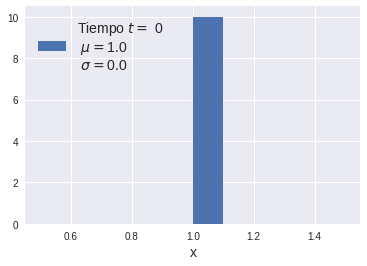

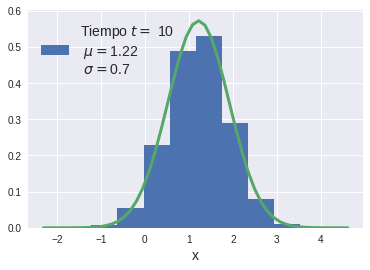

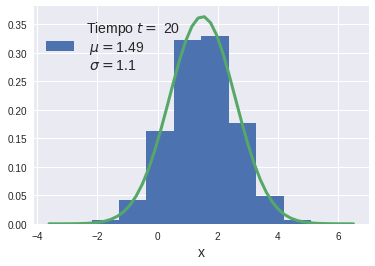

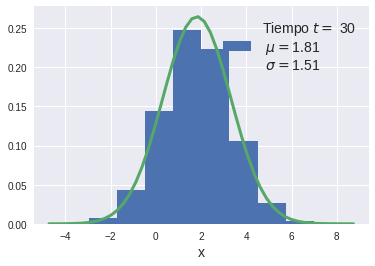

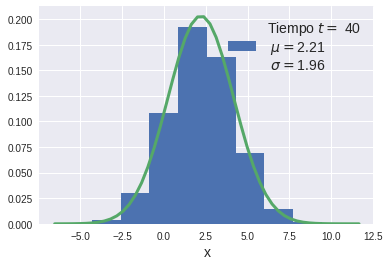

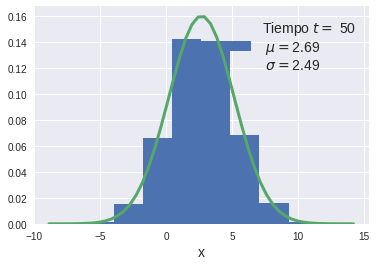

In [ ]:
N = 100000 #numero de trayectorias a simular
#parámetros de la guía (los había definido antes también)
mean = 0
sigma = 0.2
xo = 1
a = 1.02
tf = 50
#matriz para guardar las trayectorias
#fila_i: corresponde a la i-esima trayectoria simulada
#columna_i: x(t_i) para la simulación de la fila correspondiente
trayectories = np.zeros(shape=(N,tf+1))
for i in range(N):
  trayectories[i,:] = langevin_additive(mean,sigma,xo,a,tf)
#ya calculamos todas las trayectorias
#ahora vamos a hacer histogramas para valores de t = 0,10,20,30,40,50
t = np.array([0,10,20,30,40,50])
mean = np.zeros(shape=t.shape[0])
std = np.zeros(shape=t.shape[0])
for i in t:
  mean[int (i/10)] = np.mean(trayectories[:,i])
  std[int (i/10)] = np.std(trayectories[:,i])
  plt.hist(trayectories[:,i],density=True,label='Tiempo '+ r'$t=$ '+str(i)+'\n $\mu=$'+str(round(mean[int (i/10)],2))+'\n $\sigma=$'+str(round(std[int (i/10)],2)))
  x_gaussian = np.linspace(min(trayectories[:,i])-0.5,max(trayectories[:,i])+0.5)
  y_gaussian = norm(mean[int (i/10)], std[int (i/10)])
  plt.plot(x_gaussian, y_gaussian.pdf(x_gaussian),linewidth=3)
  plt.legend(fontsize=14)
  plt.xlabel('x',fontsize=14)
  plt.show()

Finalmente, graficaremos $\mu$ y $\sigma$ en función del tiempo, para observar como ambas cantidades evolucionan. 

Text(0, 0.5, '$\\sigma$')

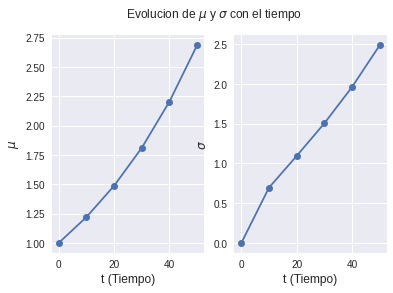

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Evolucion de $\mu$ y $\sigma$ con el tiempo')
ax1.plot(t, mean,'-o')
ax1.set_xlabel('t (Tiempo)',fontsize=12)
ax1.set_ylabel(r'$\mu$',fontsize=12)
ax2.plot(t, std,'-o')
ax2.set_xlabel('t (Tiempo)',fontsize=12)
ax2.set_ylabel(r'$\sigma$',fontsize=12)

## **Ruido Multiplicativo**

Recordamos la consigna de estudio para el ruido multipicativo. Se consideraba una población con una dinámica multiplicativa y con un ruido multiplicativo sobre $a$:

$x(t+1) = a x(t) + x(t) z(t)$,

donde $z(t)$ es una variable aleatoria de distribución gaussiana de media $\mu$ y desviación estándar $\sigma$. 

Los parámetros y condiciones iniciales son los mismos que con el ruido aditivo. Nos piden hacer algo análogo a lo que hicimos para la situación anterior.

Así, primero calculamos una docena de trayectorias, y las comparamos en un gráfico tipo x(t) junto con la trayectoria sin ruido.

In [ ]:
#para las simulaciones con ruido multiplicativo, esta funcion me va a producir una instancia en particular
def langevin_multiplicative(mean,sigma,xo,a,tf):
  #mean: media del ruido multiplicativo
  #sigma: sigma del ruido multiplicativo
  #xo: condición inicial x(0)
  #a: valor de la constante a del enunciado
  #tf: tiempo final, la simulación va desde t=0 hasta t=tf
  x = np.zeros(shape=tf+1)
  x[0] = 1 #pongo el primer valor de condicion inicial
  #y ahora el resto de los valores
  for i in range(tf):
    x[i+1] = (a + np.random.normal(mean,sigma))*x[i]
  return x

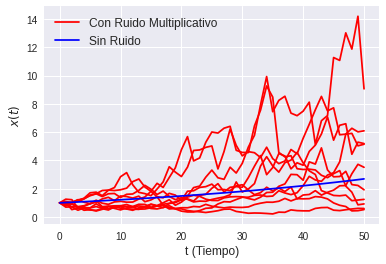

In [ ]:
#inicializo con los parámetros que me piden en la guía
mean = 0
sigma = 0.2
xo = 1
a = 1.02
tf = 50
#y ahora me piden una decena de trayectorias
#también, dibujo la trayectoria sin ruido
#en gráficos de x(t) para todas las trayectorias
#primero, grafico la decena de trayectorias con ruido de langevin
for i in range(10):
  if i == 0:
    plt.plot(langevin_multiplicative(mean,sigma,xo,a,tf),'-r',label='Con Ruido Multiplicativo')
  else:
    plt.plot(langevin_multiplicative(mean,sigma,xo,a,tf),'-r')
#segundo, grafico la trayectoria sin ruido, poniendo mean=sigma=0
plt.plot(langevin_multiplicative(0,0,xo,a,tf),'-b',label='Sin Ruido') 
plt.xlabel(r't (Tiempo)',fontsize=12)
plt.ylabel(r'$x(t)$',fontsize=12)
plt.legend(fontsize=12)

Ahora, calculamos la distribución de probabilidad $P(x,t)$ utilizando el tiempo $t$ como un parámetro. Para esto, simulamos varias trayectorias y graficamos histogramas, para diferentes valores discretos de $t$. También, vamos a calcular los valores de la media $\mu$ y de la desviación estándard $\sigma$. Así, sobre los histogramas, graficaremos la distribución gaussiana que correspondería. 

0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


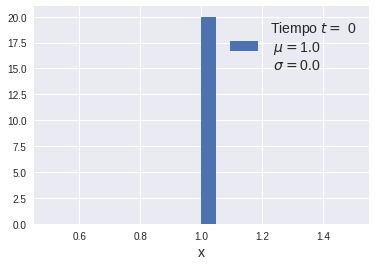

1.0


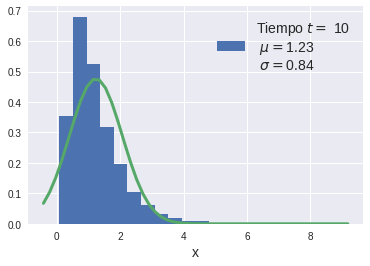

2.0


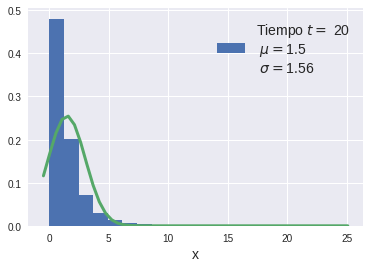

3.0


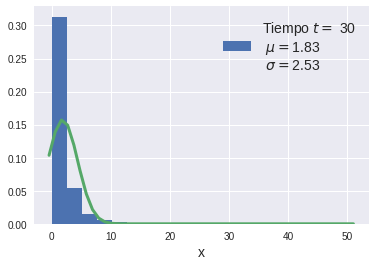

4.0


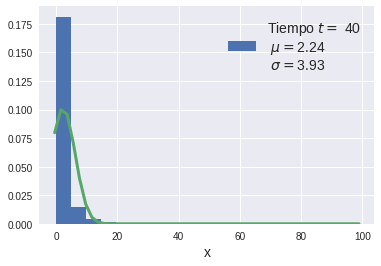

5.0


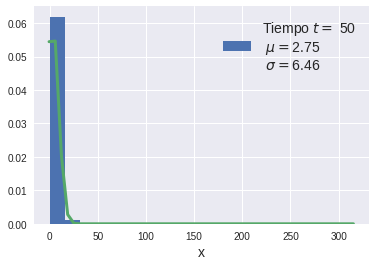

In [ ]:
N = 10000 #numero de trayectorias a simular
#parámetros de la guía (los había definido antes también)
mean = 0
sigma = 0.2
xo = 1
a = 1.02
tf = 50
#matriz para guardar las trayectorias
#fila_i: corresponde a la i-esima trayectoria simulada
#columna_i: x(t_i) para la simulación de la fila correspondiente
trayectories = np.zeros(shape=(N,tf+1))
for i in range(N):
  trayectories[i,:] = langevin_multiplicative(mean,sigma,xo,a,tf)
#ya calculamos todas las trayectorias
#ahora vamos a hacer histogramas para valores de t = 0,10,20,30,40,50
t = np.array([0,10,20,30,40,50])
mean = np.zeros(shape=t.shape[0])
std = np.zeros(shape=t.shape[0])
for i in t:
  mean[int (i/10)] = np.mean(trayectories[:,i])
  std[int (i/10)] = np.std(trayectories[:,i])
  plt.hist(trayectories[:,i],bins=20,density=True,label='Tiempo '+ r'$t=$ '+str(i)+'\n $\mu=$'+str(round(mean[int (i/10)],2))+'\n $\sigma=$'+str(round(std[int (i/10)],2)))
  x_gaussian = np.linspace(min(trayectories[:,i])-0.5,max(trayectories[:,i])+0.5)
  y_gaussian = norm(mean[int (i/10)], std[int (i/10)])
  plt.plot(x_gaussian, y_gaussian.pdf(x_gaussian),linewidth=3)
  plt.legend(fontsize=14)
  plt.xlabel('x',fontsize=14)
  plt.show()

Text(0, 0.5, '$\\sigma$')

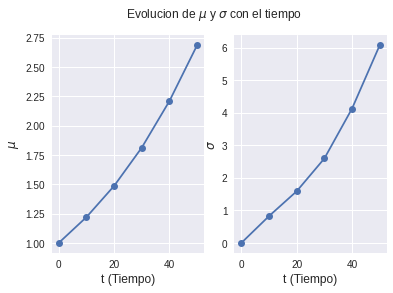

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Evolucion de $\mu$ y $\sigma$ con el tiempo')
ax1.plot(t, mean,'-o')
ax1.set_xlabel('t (Tiempo)',fontsize=12)
ax1.set_ylabel(r'$\mu$',fontsize=12)
ax2.plot(t, std,'-o')
ax2.set_xlabel('t (Tiempo)',fontsize=12)
ax2.set_ylabel(r'$\sigma$',fontsize=12)